## ARCHIMEDES OPTIMIZATION ALGORITHM

In [1]:
import numpy as np
import random

C1=2;
C2=6;
u=0.9;
l=0.1;

materials_no = 30
Max_iter = 1000
C3=2;C4=.5;

lb = np.array([-1,-1,-1])
ub = np.array([2,2,2])

dub = np.size(lb)
X = np.zeros((materials_no,dub))
acc = np.zeros((materials_no,dub))
den = np.zeros((materials_no,dub))
vol = np.zeros((materials_no,dub))
Y = np.zeros((materials_no,1))

def Fun(u):
    z = (1-u[0])**2 + 100*(u[1] - u[0]**2)**2 + 100*(u[2] - u[1]**2)**2 
    return z

for j in range(materials_no):
    for k in range(len(lb)):
        X[j][k]   =  random.uniform(lb[k],ub[k])
        acc[j][k] = (random.uniform(lb[k],ub[k]))
        den[j][k] = (random.random())
        vol[j][k] = (random.random())
        Y[j][0] = Fun(X[j,:])

In [2]:
Scorebest = np.min(Y)
Score_index = np.argmin(Y)
Xbest = X[Score_index]
den_best=den[Score_index][:];
vol_best=vol[Score_index];
acc_best=acc[Score_index];
acc_norm=acc;
acc_temp = np.zeros((materials_no, len(den[0])))
X_new = np.zeros((materials_no, len(den[0])))
Convergence_curve = np.zeros((1,Max_iter))

In [3]:
for t in range(Max_iter):
    TF = np.exp((t+1-Max_iter)/(Max_iter))
    if TF > 1:
      TF = 1
    d=np.exp((Max_iter-t)/Max_iter)-(t/Max_iter)
    acc=acc_norm
    r=random.random()
    for i in range(materials_no):
      den[i][:] = np.array(den[i][:]) + r*(den_best-np.array(den[i][:]))
      vol[i][:] = np.array(vol[i][:]) + r*(vol_best-np.array(vol[i][:]))
      if TF < 0.5:
        mr = random.randint(0,materials_no-1)
        acc_temp[i][:] = np.divide((np.array(den[mr][:]) + np.multiply(np.array(vol[mr][:]),np.array(acc[mr][:]))), (random.random() * np.multiply(np.array(den[mr][:]), np.array(vol[mr][:]))))  # Eq. (10)
      else:
        acc_temp[i][:] = np.divide((den_best + np.multiply(vol_best, acc_best)),(random.random()*np.multiply(np.array(den[i][:]), np.array(vol[i][:])))) # Eq. (11)
        #print(acc_temp)
    acc_norm = np.divide(u*(acc_temp-np.min(acc_temp)),(np.max(acc_temp)-np.min(acc_temp)))+l
    for i in range(materials_no):
      if TF < 0.5:
        for j in range(len(lb)):
          mrand = random.randint(0,materials_no-1)
          X_new[i][j] = X[i][j]+C1*random.random()*np.multiply(acc_norm[i][j],(X[mrand][j]-X[i][j]))*d;  # Eq. (13)
      else:
        for j in range(len(lb)):
          p = 2*random.random()-C4
          T = C3*TF
          if T > 1:
            T=1
          if p<.5:
            X_new[i][j] = np.array(Xbest[j]) + C2*random.random()*np.multiply(np.array(acc_norm[i][j]),T*np.array(Xbest[j])-np.array(X[i][j]))*d
          else:
            X_new[i][j] = np.array(Xbest[j]) - C2*random.random()*np.multiply(np.array(acc_norm[i][j]),T*np.array(Xbest[j])-np.array(X[i][j]))*d


In [4]:
import numpy as np
import random
# MINHA VERSAO 2
def AOA(f,materials_no,Max_iter,lb,ub,C3,C4):
  C1=2;
  C2=6;
  u=0.9;
  l=0.1;

  def fun_checkpositions(vec_pos,var_no_group,lb,ub):
      Lb = lb
      Ub = ub
      for i in range(var_no_group):
        is_below_lb = vec_pos[i] < Lb;
        is_above_ub = vec_pos[i] > Ub;
        vec_pos[i][is_below_lb] = Lb[is_below_lb]
        vec_pos[i][is_above_ub] = Ub[is_above_ub]
      return vec_pos

  dub = np.size(lb)
  X = np.zeros((materials_no,dub))
  acc = np.zeros((materials_no,dub))
  den = np.zeros((materials_no,dub))
  vol = np.zeros((materials_no,dub))
  Y = np.zeros((materials_no,1))
  for j in range(materials_no):
    for k in range(len(lb)):
      X[j][k]   =  random.uniform(lb[k],ub[k])
      acc[j][k] = (random.uniform(lb[k],ub[k]))
      den[j][k] = (random.random())
      vol[j][k] = (random.random())
      Y[j][0] = f(X[j,:])

  Scorebest = np.min(Y)
  Score_index = np.argmin(Y)
  Xbest = X[Score_index]
  den_best=den[Score_index][:];
  vol_best=vol[Score_index];
  acc_best=acc[Score_index];
  acc_norm=acc;
  acc_temp = np.zeros((materials_no, len(den[0])))
  X_new = np.zeros((materials_no, len(den[0])))
  Convergence_curve = np.zeros((1,Max_iter))

  for t in range(Max_iter):
    TF = np.exp((t+1-Max_iter)/(Max_iter))
    if TF > 1:
      TF = 1
    d=np.exp((Max_iter-t)/Max_iter)-(t/Max_iter)
    acc=acc_norm
    r=random.random()
    for i in range(materials_no):
      den[i][:] = np.array(den[i][:]) + r*(den_best-np.array(den[i][:]))
      vol[i][:] = np.array(vol[i][:]) + r*(vol_best-np.array(vol[i][:]))
      if TF < 0.5:
        mr = random.randint(0,materials_no-1)
        acc_temp[i][:] = np.divide((np.array(den[mr][:]) + np.multiply(np.array(vol[mr][:]),np.array(acc[mr][:]))), (random.random() * np.multiply(np.array(den[mr][:]), np.array(vol[mr][:]))))  # Eq. (10)
      else:
        acc_temp[i][:] = np.divide((den_best + np.multiply(vol_best, acc_best)),(random.random()*np.multiply(np.array(den[i][:]), np.array(vol[i][:])))) # Eq. (11)
        #print(acc_temp)
    acc_norm = np.divide(u*(acc_temp-np.min(acc_temp)),(np.max(acc_temp)-np.min(acc_temp)))+l
    for i in range(materials_no):
      if TF < 0.5:
        for j in range(len(lb)):
          mrand = random.randint(0,materials_no-1)
          X_new[i][j] = X[i][j]+C1*random.random()*np.multiply(acc_norm[i][j],(X[mrand][j]-X[i][j]))*d;  # Eq. (13)
      else:
        for j in range(len(lb)):
          p = 2*random.random()-C4
          T = C3*TF
          if T > 1:
            T=1
          if p<.5:
            X_new[i][j] = np.array(Xbest[j]) + C2*random.random()*np.multiply(np.array(acc_norm[i][j]),T*np.array(Xbest[j])-np.array(X[i][j]))*d
          else:
            X_new[i][j] = np.array(Xbest[j]) - C2*random.random()*np.multiply(np.array(acc_norm[i][j]),T*np.array(Xbest[j])-np.array(X[i][j]))*d

    X_new = fun_checkpositions(X_new,materials_no,lb,ub)
    for i in range(materials_no):
      v = f(X_new[i])
      if v < Y[i]:
        X[i] = X_new[i]
        Y[i] = v

    var_Ybest = np.min(Y)
    var_index = np.argmin(Y)
    Convergence_curve[0][t]=var_Ybest;
    if var_Ybest < Scorebest:
      Scorebest = var_Ybest
      Score_index = var_index
      Xbest = X[var_index][:]
      den_best = den[Score_index][:]
      vol_best = vol[Score_index][:]
      acc_best = acc[Score_index][:]
  return Xbest, Scorebest, Convergence_curve





### RESOLUCAO DE PROBLEMAS

Ponto Otimo: [1. 1.]
Solucao Otima 2.1466181832833737e-21


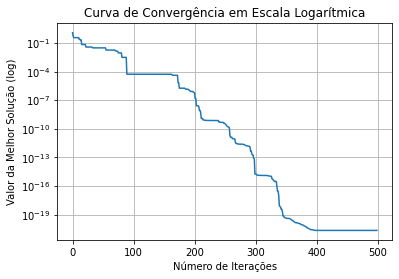

In [5]:
import matplotlib.pyplot as plt

materials_no = 50
N_max = 500
C3=2;C4=.5;

lb = np.array([-5,-5])
ub = np.array([10,10])

def Fun(x):
  z = 100*(x[1]-x[0]**2)**2 + (x[0]-1)**2
  return z

best,fmin,conv_curve = AOA(Fun,materials_no,N_max,lb,ub,C3,C4)

print(f"Ponto Otimo: {best}")
print(f"Solucao Otima {fmin}")

plt.semilogy(range(N_max), conv_curve[0])
plt.xlabel('Número de Iterações')
plt.ylabel('Valor da Melhor Solução (log)')
plt.title('Curva de Convergência em Escala Logarítmica')
plt.grid(True)
plt.show()

Ponto Otimo: [1.00767809 1.01544239 1.03112512]
Solucao Otima 5.9027717115860464e-05


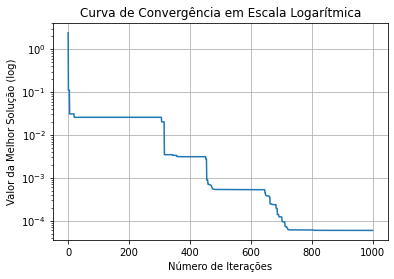

In [6]:
import matplotlib.pyplot as plt

materials_no = 100
N_max = 1000
C3=2;C4=.5;

lb = np.array([-1,-1,-1])
ub = np.array([2,2,2])

def Fun(u):
    z = (1-u[0])**2 + 100*(u[1] - u[0]**2)**2 + 100*(u[2] - u[1]**2)**2 
    return z

best,fmin,conv_curve = AOA(Fun,materials_no,N_max,lb,ub,C3,C4)

print(f"Ponto Otimo: {best}")
print(f"Solucao Otima {fmin}")

plt.semilogy(range(N_max), conv_curve[0])
plt.xlabel('Número de Iterações')
plt.ylabel('Valor da Melhor Solução (log)')
plt.title('Curva de Convergência em Escala Logarítmica')
plt.grid(True)
plt.show()

Ponto Otimo: [0.63737744]
Solucao Otima -0.33290966828418045


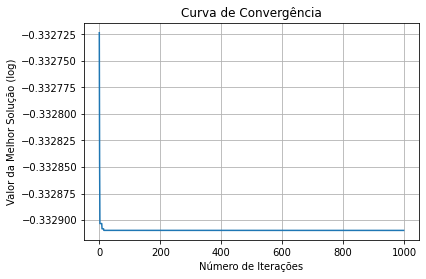

In [7]:

import sys
sys.path.append('C:/Users/paulo/Documents/Mestrado/Projeto/Codes/problemas_selecionados')
import problema3 as p3
import matplotlib.pyplot as plt

materials_no = 100
N_max = 1000
C3=2;C4=.5;

fobj = p3.func
lb,ub = p3.constraint()
best,fmin,conv_curve = AOA(fobj,materials_no,N_max,lb,ub,C3,C4)

print(f"Ponto Otimo: {best}")
print(f"Solucao Otima {fmin}")

plt.plot(range(N_max), conv_curve[0])
plt.xlabel('Número de Iterações')
plt.ylabel('Valor da Melhor Solução (log)')
plt.title('Curva de Convergência')
plt.grid(True)
plt.show()

C:\Users/paulo/Documents/Mestrado/Projeto/Codes/problemas_selecionados\problema11.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  g3 = 1 - (140.45*x1)/(x2**2*x3)


Ponto Otimo: [0.05      0.6076142 2.       ]
Solucao Otima 0.006076141973704577


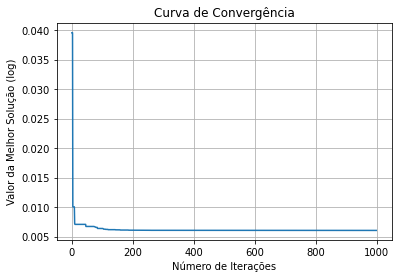

In [11]:
import sys
sys.path.append('C:/Users/paulo/Documents/Mestrado/Projeto/Codes/problemas_selecionados')
import problema11 as p11
import matplotlib.pyplot as plt

materials_no = 50
N_max = 1000
#C3=2;C4=.5;
C3 = 1; C4 =2;

fobj = p11.func
lb,ub = p11.constraint()
best,fmin,conv_curve = AOA(fobj,materials_no,N_max,lb,ub,C3,C4)

print(f"Ponto Otimo: {best}")
print(f"Solucao Otima {fmin}")

plt.plot(range(N_max), conv_curve[0])
plt.xlabel('Número de Iterações')
plt.ylabel('Valor da Melhor Solução (log)')
plt.title('Curva de Convergência')
plt.grid(True)
plt.show()